In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import platform
import csv

In [97]:
FILE = '공공보건의료기관현황.csv'
gongdf = pd.read_csv(FILE, encoding='euc-kr', index_col = 0)
print(gongdf.columns)
gongdf.head(5)

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


### 주소에서 시도, 군구 정보 분리

In [98]:
address = gongdf['주소'].str.split(expand=True).iloc[:,0:2]
address.rename(columns={0:'시도', 1: '군구'}, inplace=True)
address['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '의창구', '김해시', '양산시', '거창군',
       '마산합포구3.15대로', '남해군', '창원시', '의령군', '포항시', '김천시', '안동시', '울진군',
       '경주시', '구미시', '영주시', '상주시', '문경시', '경안로', '의성군', '청도군', '고령군',
       '칠곡군', '봉화군', '울릉군', '부평구', '북구', '순천시', '대덕구', '태백시', '동해시',
       '화성시', '광산구', '남구', '중구', '아란13길', '서구', '전주시', '진주시', '청주시',
       '종로구', '성남시', '동구', '화순군', '강동구', '사상구', '달서구', '해운대구', '유성구',
       '가평군', '양주시', '고양시', '홍천군', '양구군', '청원군', '계룡시', '논산시', '함평군',
       '경산시', '양평군', '수성구', '달성군', '연수구', '노원구', '기장군', '공주시', '강북구',
       '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구', '동매로', '서초구', '은평구',
       '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구', '송파구', '울주군', '계양구',
       '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군', '강진군', '곡성군', '여수시',
       '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시', '군산시', '고창군', '진안군',
       '제주시', '서귀

In [99]:
# 창원시, 경산시, 천안시 주소 데이터 변경
address[address['시도'] == '창원시']

address.iloc[27] = ['경상남도', '창원시']
address.iloc[31] = ['경상남도', '창원시']

In [100]:
address[address['시도'] == '경산시']

address.loc[48] = ['경상북도', '경산시']

In [101]:
address[address['시도'] == '천안시']

address.loc[203] = ['경기도', '천안시']
address.loc[204] = ['경기도', '천안시']

In [102]:
# 표준 행정구역 이름으로 수정
address['시도'].unique()

add_aliases = {'경기': '경기도', '경남': '경상남도', '경북': '경상북도', '충북': '충청북도', '서울시': '서울특별시', '부산특별시': '부산광역시', '대전시': '대전광역시', '충남': '충청남도', '전남': '전라남도', '전북': '전라북도'}
address['시도']

# key에 해당하는 값이 없으면 default값을 리턴
address['시도'] = address['시도'].apply(lambda x: add_aliases.get(x, x))

In [103]:
address['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [104]:
address['군구'].unique()

address[address['군구'] == '아란13길']
address.loc[76] = ['제주특별자치도', '제주시']
address.loc[76]

시도    제주특별자치도
군구        제주시
Name: 76, dtype: object

In [105]:
address['시도군구'] = address['시도'] + ' ' + address['군구']
address.head()

,시도,군구,시도군구
연번,,,
1,강원도,춘천시,강원도 춘천시
2,강원도,삼척시,강원도 삼척시
3,강원도,영월군,강원도 영월군
4,강원도,원주시,강원도 원주시
5,강원도,강릉시,강원도 강릉시


In [106]:
address['카운트'] = 0
address.head()

,시도,군구,시도군구,카운트
연번,,,,
1,강원도,춘천시,강원도 춘천시,0
2,강원도,삼척시,강원도 삼척시,0
3,강원도,영월군,강원도 영월군,0
4,강원도,원주시,강원도 원주시,0
5,강원도,강릉시,강원도 강릉시,0


In [107]:
address_group = address.groupby(['시도', '군구', '시도군구'], as_index=False).count()
address_group

,시도,군구,시도군구,카운트
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
...,...,...,...,...
135,충청북도,영동군,충청북도 영동군,1
136,충청북도,제천시,충청북도 제천시,1
137,충청북도,청원군,충청북도 청원군,1
138,충청북도,청주시,충청북도 청주시,4


In [108]:
address_group.set_index('시도군구', inplace=True)
address_group.head()

,시도,군구,카운트
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


#### 행정구역별 인구 데이터 준비

In [109]:
FILE2 = '행정구역시군구별_성별인구수.xlsx'
haengdf = pd.read_excel(FILE2)
haengdf

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [110]:
# 컬럼의 이름 변경
haengdf.rename(columns={'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'}, inplace=True)
haengdf

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [111]:
# 행정구역별 데이터에서 병합에 사용할 공통 컬럼 추가
haengdf['군구'] = haengdf['군구'].str.strip()
haengdf['군구'].unique()

array(['소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '미추홀구', '연수구',
       '남동구', '부평구', '계양구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울주군',
       '세종시', '수원시', '장안구', '권선구', '팔달구', '영통구', '성남시', '수정구', '중원구',
       '분당구', '의정부시', '안양시', '만안구', '동안구', '부천시', '광명시', '평택시', '동두천시',
       '안산시', '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시', '구리시',
       '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '처인구', '기흥구',
       '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시',
       '여주시', '연천군', '가평군', '양평군', '춘천시', '원주시', '강릉시', '동해시', '태백시',
       '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군',
       '양구군', '인제군', '고성군', '양양군', '청주시', '서원구', '청원구', '상당구', '흥덕구',
       '충주시', '

In [112]:
# 시도와 군구를 연결하여 시도군구 컬럼 추가
haengdf['시도군구'] = haengdf['시도'] + ' ' + haengdf['군구']
haengdf['시도군구']

0             전국 소계
1          서울특별시 소계
2         서울특별시 종로구
3          서울특별시 중구
4         서울특별시 용산구
           ...     
274        경상남도 거창군
275        경상남도 합천군
276      제주특별자치도 소계
277     제주특별자치도 제주시
278    제주특별자치도 서귀포시
Name: 시도군구, Length: 279, dtype: object

In [113]:
cond = haengdf['군구'] != '소계'
haengdf = haengdf[cond]
haengdf.set_index('시도군구', inplace=True)

In [114]:
haengdf

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099
...,...,...,...,...,...
경상남도 함양군,경상남도,함양군,39555,19058,20497
경상남도 거창군,경상남도,거창군,62049,30275,31774
경상남도 합천군,경상남도,합천군,45054,21590,23464


In [115]:
# 데이터프레임 병합
mergedf = pd.merge(address_group, haengdf, how='inner', left_index=True, right_index=True)
mergedf

,시도_x,군구_x,카운트,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,29664,15023,14641
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523,24060,24463
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359,67326,67033


In [116]:
haengdf.시도

시도군구
서울특별시 종로구         서울특별시
서울특별시 중구          서울특별시
서울특별시 용산구         서울특별시
서울특별시 성동구         서울특별시
서울특별시 광진구         서울특별시
                 ...   
경상남도 함양군           경상남도
경상남도 거창군           경상남도
경상남도 합천군           경상남도
제주특별자치도 제주시     제주특별자치도
제주특별자치도 서귀포시    제주특별자치도
Name: 시도, Length: 261, dtype: object

In [121]:
mergedf2 = mergedf[['시도_x', '군구_x', '카운트', '총인구수 (명)']]
mergedf2

,시도_x,군구_x,카운트,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,29664
충청북도 영동군,충청북도,영동군,1,48523
충청북도 제천시,충청북도,제천시,1,134359


In [122]:
mergedf2.rename(columns={'시도_x':'시도', '군구_x': '군구', '카운트':'공공의료기관수', '총인구수 (명)': '인구수'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11624\2430838045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedf2.rename(columns={'시도_x':'시도', '군구_x': '군구', '카운트':'공공의료기관수', '총인구수 (명)': '인구수'}, inplace=True)


In [126]:
mergedf2['인구대비의료기관비율'] = 100000 *mergedf2['공공의료기관수'] / mergedf2['인구수']
mergedf2

C:\Users\User\AppData\Local\Temp\ipykernel_11624\2907143196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedf2['인구대비의료기관비율'] = 100000 *mergedf2['공공의료기관수'] / mergedf2['인구수']


,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,29664,3.371090
충청북도 영동군,충청북도,영동군,1,48523,2.060878
충청북도 제천시,충청북도,제천시,1,134359,0.744275


### 지역별 공공의료기관 현황

C:\Users\User\AppData\Local\Temp\ipykernel_11624\2039971897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio.sort_values(by='공공의료기관수', ascending=False, inplace= True)


<AxesSubplot:xlabel='시도군구'>

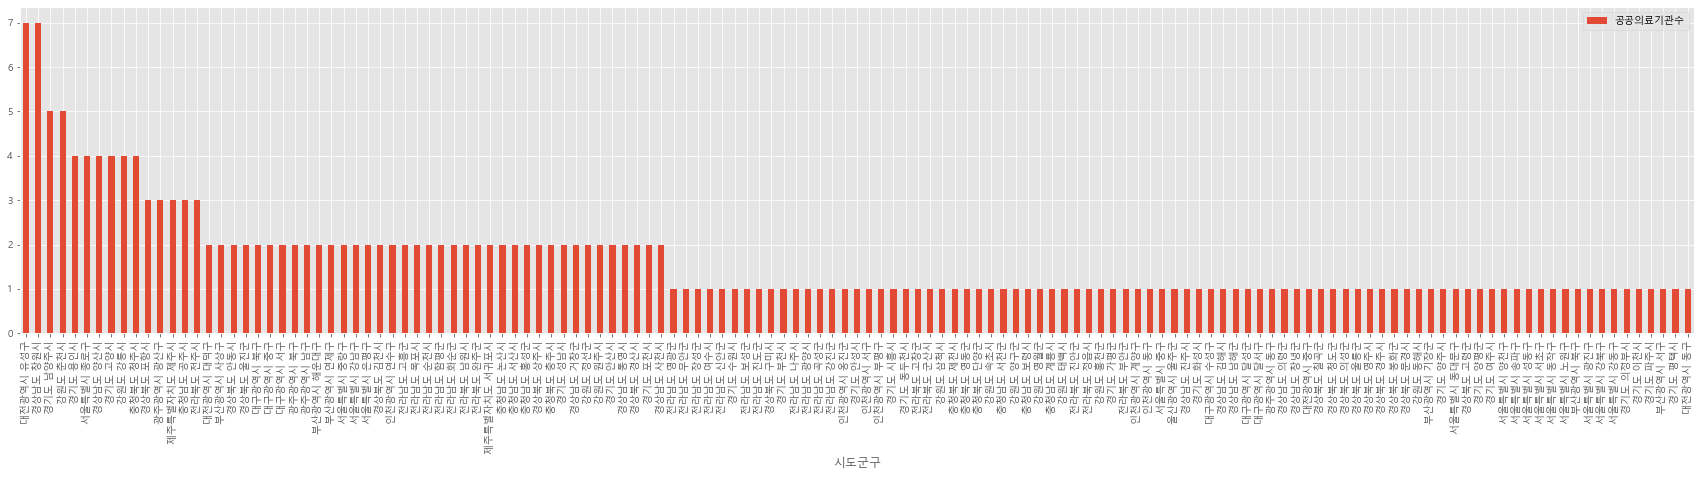

In [133]:
plt.style.use('ggplot')
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

ratio = mergedf2[['공공의료기관수']]
ratio.sort_values(by='공공의료기관수', ascending=False, inplace= True)
ratio.plot(kind='bar', rot=90, figsize= (30,6))

C:\Users\User\AppData\Local\Temp\ipykernel_11624\2108758352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio.sort_values(by='인구대비의료기관비율', ascending=False, inplace= True)


<AxesSubplot:xlabel='시도군구'>

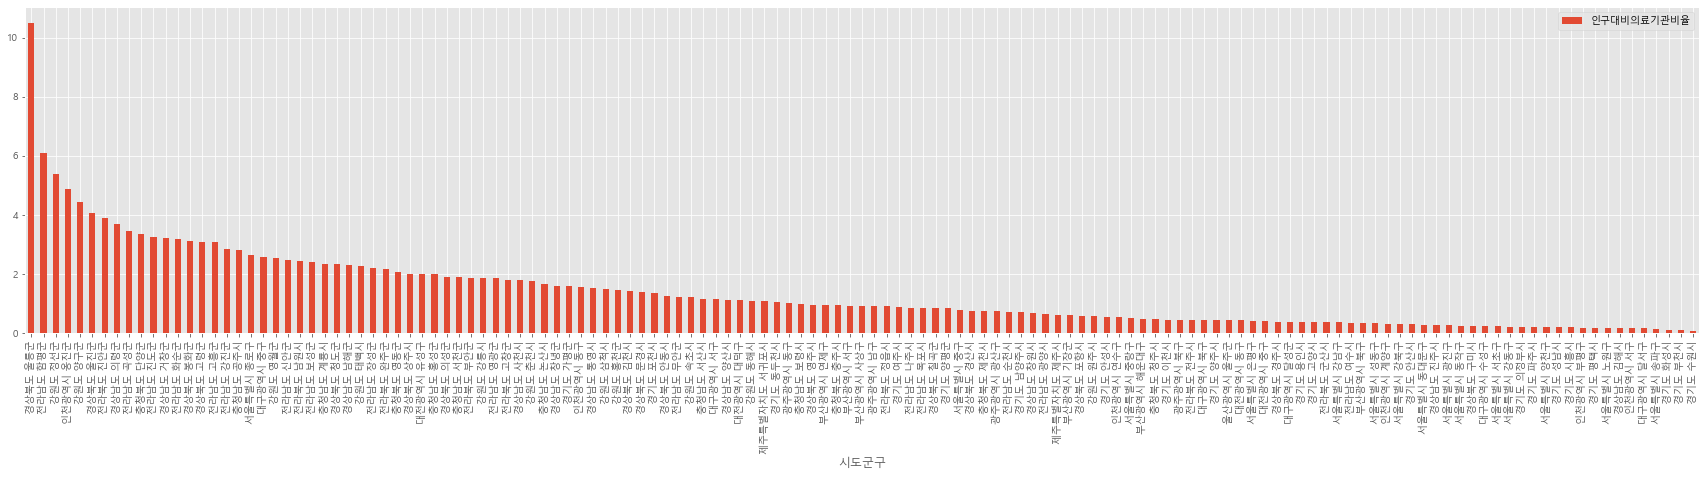

In [134]:
plt.style.use('ggplot')
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

ratio = mergedf2[['인구대비의료기관비율']]
ratio.sort_values(by='인구대비의료기관비율', ascending=False, inplace= True)
ratio.plot(kind='bar', rot=90, figsize= (30,6))

In [ ]:
df = pd.DataFrame([[-1,2],[-3,-4]])
df.abs()

,0,1
0,1,2
1,3,4


In [ ]:
df.add_prefix('label')

,label0,label1
0,-1,2
1,-3,-4


In [ ]:
df.add_suffix('label')

,0label,1label
0,-1,2
1,-3,-4


In [139]:
df.clip(-2,1) # 앞에것이 하한, 뒤에것이 상한

,0,1
0,-1,1
1,-2,-2


In [141]:
%pip install lxml
pd.read_html("인플레이션 - 국가 목록.html")

     ---------------------------------------- 3.6/3.6 MB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ImportError: lxml not found, please install it